In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import numpy as np
import geopandas

# Research: Migration dynamics of Germany's federal states in 2019

### Disclaimer: Any observations and deductions made in this project are not meant to generalize people with migration background or German people, nor should my insights from this project give room for attributing behavioral patterns to any groups of population. The numbers do not reflect the diversity of origins, histories and circumstances of migration that must be considered in topics like this. This research only aims to present migration dynamics and particularities of the (very different) German states. 

## [4th assignment: jump to 3rd research question](#4th-assignment)

### References: 
#### govdata.de: Gesamtwanderungen über die Grenzen der Bundesländer: Bundesländer, Jahre, Nationalität, Geschlecht (Total migration across the borders of the federal states: federal states, years, nationality). https://www.govdata.de/web/guest/suchen/-/details/wanderungen-bundeslander-jahre-nationalitat-geschlecht
#### destatis.de: Bundesländer mit Hauptstädten nach Fläche, Bevölkerung und Bevölkerungsdichte am 31.12.2019 (Federal states with capitals by area, population and population density on December 31, 2019). https://www.destatis.de/DE/Themen/Laender-Regionen/Regionales/Gemeindeverzeichnis/Administrativ/02-bundeslaender.html
#### destatis.de: Bevölkerung nach Nationalität und Bundesländern (Population by nationality and federal states). https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Bevoelkerungsstand/Tabellen/bevoelkerung-nichtdeutsch-laender.html
#### destatis.de: Bevölkerungsentwicklung in den Bundesländern bis 2060 (Population development in the federal states until 2060). https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Bevoelkerungsvorausberechnung/Publikationen/Downloads-Vorausberechnung/bevoelkerung-bundeslaender-2060-5124205199024.pdf?__blob=publicationFile
#### github.com: Administrative borders of Germany in GeoJSON format in different quality levels. https://github.com/isellsoap/deutschlandGeoJSON/tree/main/2_bundeslaender

In [2]:
os.chdir('C:/Users/josch/DH_csv')

In [3]:
df = pd.read_excel('Bundesländer_Migration.xls')

In [4]:
df

,Year,Federal States,Population,Area in km²,Inhabitants per km²,Percentage of inhabitants with migration background,Immigration German People,Emigration\nGerman People,Migration Balance \nGerman People,Immigration \nForeign People,Emigration \nForeign People,Migration Balance \nForeign People,Total \nImmigration,Total \nEmigration,Total \nMigration Balance
0,2019,Baden-Württemberg,11100394,35747.83,311,0.338,116906,133599,-16693,251744,197269,54475,368650,330868,37782
1,2019,Bayern,13124737,70541.57,186,0.259,112715,121155,-8440,282977,215989,61585,395692,337144,53145
2,2019,Berlin,3669491,891.12,4090,0.331,72117,84995,-12878,112627,76518,36109,184744,161513,23231
3,2019,Brandenburg,2521893,29654.43,85,0.086,56674,40587,16087,30564,23737,6827,87238,64324,22914
4,2019,Bremen,681202,419.37,1624,0.365,19134,23167,-4033,18192,14933,3259,37326,38100,-774
5,2019,Hamburg,1847253,755.09,2446,0.339,53419,57573,-4154,43820,34663,9157,97239,92236,5003
6,2019,Hessen,6288080,21115.64,298,0.344,86234,94755,-8521,150140,113102,37038,236374,207857,28517
7,2019,Mecklenburg-Vorpommern,1608138,23295.22,69,0.081,27517,21831,5686,18529,16172,2357,46046,38003,8043
8,2019,Niedersachsen,7993608,47709.80,168,0.223,122484,117406,5078,149870,119919,29951,272354,237325,35029
9,2019,Nordrhein-Westfalen,17947221,34112.44,526,0.308,141571,176442,-34871,302454,220327,82127,444025,396769,47256


### Map of Germany and its states

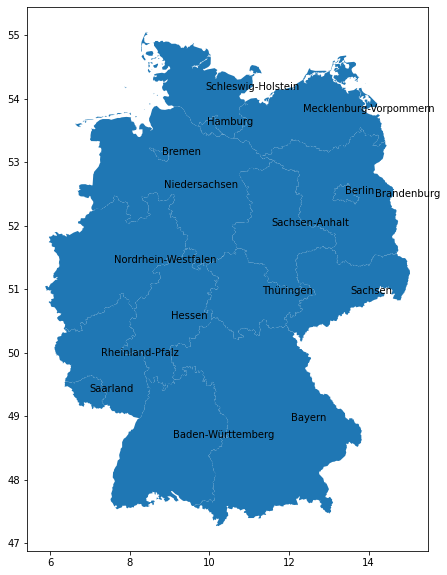

In [5]:
gdf = geopandas.read_file('C:/Users/josch/Desktop/3_mittel.geo.json')
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]
gdf.plot(figsize = (15,10))
for idx, row in gdf.iterrows():
    plt.annotate(text = row['name'], xy = row['coords'])

# Research Questions
#### 1) It is obvious that in terms of immigration to Germany as a whole, people with migration background provide higher numbers than German people. However, the same can not be assumed regarding immigration to each respective state of Germany. How big and diverse are differences of immigration throughout the 16 states?
#### 2) How do immigration and emigration numbers of people with migration background and German people respectively relate to each other, which state has notable differences?
#### Up to this point, the research is covered by Assignment 3
#### 3) Do the immigration numbers of a state correspond to its population and population density and therefore capacity for inhabitants or are there remarkable deviations?
#### 4) How can the previous findings on migration dynamics be contextualized, using migration background and geographical data?

### 1)

### Immigration numbers of German people and people with migration background

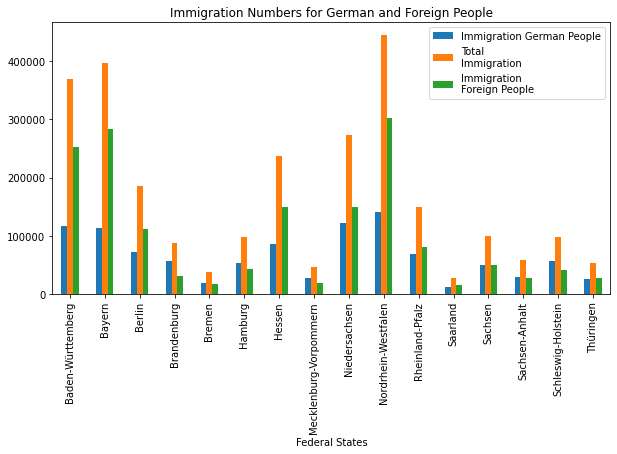

In [6]:
df.plot(x ='Federal States', y = ['Immigration German People', 'Total \nImmigration', 'Immigration \nForeign People'], kind = "bar", figsize = (10,5))
plt.title('Immigration Numbers for German and Foreign People')
plt.show()

#### From this graph, minor and major differences can already be recognized. As expected, foreign immigration outweighs German immigration in most states, with quite clear differences between the two numbers in Baden-Württemberg, Bayern, Hessen and Nordrhein-Westfalen. It can be observed that some states have a higher number of German immigration than foreign, yet not as dominant. Also, some states have quite balanced ratio of foreign and German immigration. 
#### Yet I did not just want to see the sheer range between foreign and German immigration for each state, but also the ratio of those differences, as the total numbers for each state could have very different dimensions. Therefore, my aim was to present a rough tendency of where the immigration of foreign or German people outweighed the other and where the numbers are almost balanced. 
#### For this I used different modifiers to calculate if a state had major, minor, insignificantly small or almost no difference in numbers comparing foreign and German immigration. I defined a "major difference" as being more than 50% higher than the lower value, "minor difference" more than 20% higher, "marginal difference" more than 5% higher and "almost balanced" as any value difference below. Of course I should point out that none of these attributions are representative and only stem from my arbitrary choice. Their only purpose is to demonstrate an abstract tendency.

In [7]:
foreign_major = []
foreign_minor = []
german_minor = []
foreign_marginally = []
german_marginally = []
balanced = []

for x, y, z in zip(df['Immigration German People'], df['Immigration \nForeign People'], df['Federal States']):
    if x*1.5<y:
        foreign_major.append(z)   
    elif x*1.2<y:   
        foreign_minor.append(z)  
    elif y*1.2<x:   
        german_minor.append(z) 
    elif x*1.05<y:
        foreign_marginally.append(z)
    elif y*1.05<x:
        german_marginally.append(z)
    else:     
        balanced.append(z)

In [8]:
print(foreign_major)
print(foreign_minor)
print(german_minor)
print(foreign_marginally)
print(german_marginally)
print(balanced)

['Baden-Württemberg', 'Bayern', 'Berlin', 'Hessen', 'Nordrhein-Westfalen']
['Niedersachsen', 'Saarland']
['Brandenburg', 'Hamburg', 'Mecklenburg-Vorpommern', 'Schleswig-Holstein']
['Rheinland-Pfalz', 'Thüringen']
['Bremen']
['Sachsen', 'Sachsen-Anhalt']


In [9]:
for value in range(len(foreign_major)-len(foreign_minor)):
    foreign_minor.append(' ')
for value in range(len(foreign_major)-len(german_minor)):
    german_minor.append(' ')
for value in range(len(foreign_major)-len(foreign_marginally)):
    foreign_marginally.append(' ')
for value in range(len(foreign_major)-len(german_marginally)):
    german_marginally.append(' ')
for value in range(len(foreign_major)-len(balanced)):
    balanced.append(' ')
    

data = {'Foreign immigration significantly higher': foreign_major, 'Foreign immigration higher': foreign_minor,
        'Foreign immigration marginally higher': foreign_marginally, 'German immigration higher': german_minor, 
        'German immigration marginally higher': german_marginally, 'Im. almost at same level': balanced}

immigration_df = pd.DataFrame(data)

immigration_df

,Foreign immigration significantly higher,Foreign immigration higher,Foreign immigration marginally higher,German immigration higher,German immigration marginally higher,Im. almost at same level
0,Baden-Württemberg,Niedersachsen,Rheinland-Pfalz,Brandenburg,Bremen,Sachsen
1,Bayern,Saarland,Thüringen,Hamburg,,Sachsen-Anhalt
2,Berlin,,,Mecklenburg-Vorpommern,,
3,Hessen,,,Schleswig-Holstein,,
4,Nordrhein-Westfalen,,,,,


#### **Conclusions:** In Baden-Württemberg, Bayern, Berlin, Hessen and Nordrhein-Westfalen there was a considerably higher number of immigrated people originally from foreign countries than from within Germany. In Niedersachsen and Saarland this number was less, but still higher. States that had an arguably remarkable gap in favor of German immigration were Brandenburg or Mecklenburg-Vorpommern. However, these differences in numbers do not come close to the ratio difference in Baden-Württemberg, Bayern or Nordrhein-Westfalen. In the case of 5 states, the immigration numbers for foreign and German people were roughly at the same level or only marginally higher for one or the other origin. 

### 2)

### Emigration numbers of German people and people with migration background

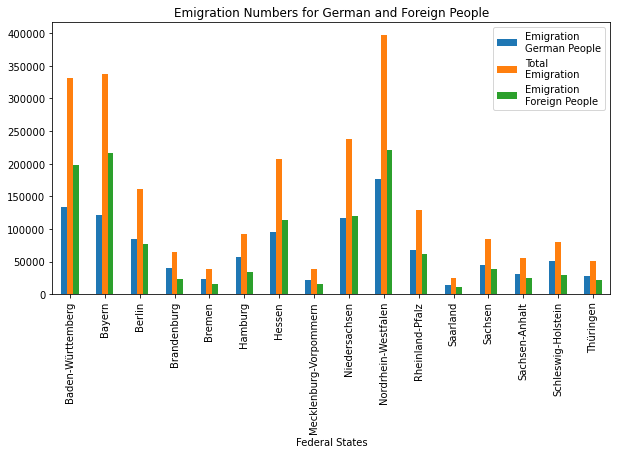

In [10]:
df.plot(x = 'Federal States', y = ['Emigration\nGerman People', 'Total \nEmigration', 'Emigration \nForeign People'],
kind = "bar", figsize = (10,5))
plt.title('Emigration Numbers for German and Foreign People')
plt.show()

#### This graph, now focussing on all the people leaving states in 2019, shows similar tendencies as with the immigration numbers. Yet it appears as though there are no huge gaps between the numbers of foreign and German people emigrating. Only Baden-Württemberg and Bayern seem to remain in the pattern of immigration with considerably more foreign people migrating than German people. Furthermore, more states have higher German emigration than foreign emigration, with more considerable gaps between the numbers as well. Let's have a look at the ratio:

In [11]:
foreign_major2 = []
foreign_minor2 = []
german_major2 = []
german_minor2 = []
foreign_marginally2 = []
german_marginally2 = []
balanced2 = []

for x, y, z in zip(df['Emigration\nGerman People'], df['Emigration \nForeign People'], df['Federal States']):
    if x*1.5<y:
        foreign_major2.append(z) 
    elif y*1.5<x:
        german_major2.append(z)
    elif x*1.2<y:   
        foreign_minor2.append(z)  
    elif y*1.2<x:   
        german_minor2.append(z) 
    elif x*1.05<y:
        foreign_marginally2.append(z)
    elif y*1.05<x:
        german_marginally2.append(z)
    else:     
        balanced2.append(z)

In [12]:
print(foreign_major2)
print(foreign_minor2)
print(german_major2)
print(german_minor2)
print(foreign_marginally2)
print(german_marginally2)
print(balanced2)

['Bayern']
['Baden-Württemberg', 'Nordrhein-Westfalen']
['Brandenburg', 'Bremen', 'Hamburg', 'Schleswig-Holstein']
['Mecklenburg-Vorpommern', 'Saarland', 'Thüringen']
['Hessen']
['Berlin', 'Rheinland-Pfalz', 'Sachsen', 'Sachsen-Anhalt']
['Niedersachsen']


In [13]:
for value in range(len(german_major2)-len(foreign_minor2)):
    foreign_minor2.append(' ')
for value in range(len(german_major2)-len(foreign_major2)):
    foreign_major2.append(' ')
for value in range(len(german_major2)-len(german_minor2)):
    german_minor2.append(' ')
for value in range(len(german_major2)-len(foreign_marginally2)):
    foreign_marginally2.append(' ')
for value in range(len(german_major2)-len(balanced2)):
    balanced2.append(' ')
    
data = {'Foreign emigration significantly higher': foreign_major2, 'Foreign emigration higher': foreign_minor2,
        'Foreign emigration marginally higher': foreign_marginally2, 'German emigration significantly higher': german_major2, 
        'German emigration higher': german_minor2, 'German emigration marginally higher': german_marginally2,
        'Em. almost at same level': balanced2}

emigration_df = pd.DataFrame(data)

emigration_df

,Foreign emigration significantly higher,Foreign emigration higher,Foreign emigration marginally higher,German emigration significantly higher,German emigration higher,German emigration marginally higher,Em. almost at same level
0,Bayern,Baden-Württemberg,Hessen,Brandenburg,Mecklenburg-Vorpommern,Berlin,Niedersachsen
1,,Nordrhein-Westfalen,,Bremen,Saarland,Rheinland-Pfalz,
2,,,,Hamburg,Thüringen,Sachsen,
3,,,,Schleswig-Holstein,,Sachsen-Anhalt,


#### For the next step, I want to put the immigration and emigration ratios together, in order to gather tendencies for each state. First I will sort the ratio dataframe by the federal states, so that both dataframes can be combined through the federal states in the column. Those two new dictionaries will be merged with the keys remaining and in the process I am going to abbreviate the tendency descriptions for a better overview. For example "Foreign immigration significantly higher" will become "F_I_50", with "F" and "I" representing "foreign" and "immigration" and the value "50" the corresponding percentage showing how much one number of people is higher than the other.

In [14]:
foreign_major2 = []
foreign_minor2 = []
german_major2 = []
german_minor2 = []
foreign_marginally2 = []
german_marginally2 = []
balanced2 = []

for x,y,z in zip(df['Emigration\nGerman People'], df['Emigration \nForeign People'], df['Federal States']):
    if x*1.5<y:
        foreign_major2.append(z) 
    elif y*1.5<x:
        german_major2.append(z)
    elif x*1.2<y:   
        foreign_minor2.append(z)  
    elif y*1.2<x:   
        german_minor2.append(z) 
    elif x*1.05<y:
        foreign_marginally2.append(z)
    elif y*1.05<x:
        german_marginally2.append(z)
    else:     
        balanced2.append(z)

In [15]:
foreign_major2 = tuple(foreign_major2)
german_major2 = tuple(german_major2)
foreign_minor2 = tuple(foreign_minor2)
german_minor2 = tuple(german_minor2)
foreign_marginally2 = tuple(foreign_marginally2)
german_marginally2 = tuple(german_marginally2)
balanced2 = tuple(balanced2)  
    
data = {'F_E_50': foreign_major2, 'F_E_20': foreign_minor2,
        'F_E_05': foreign_marginally2, 'G_E_50': german_major2, 
        'G_E_20': german_minor2, 'G_E_05': german_marginally2,
        'Em_balanced': balanced2}

new_data2 = {value:key for key, value in data.items()}
print(new_data2)

{('Bayern',): 'F_E_50', ('Baden-Württemberg', 'Nordrhein-Westfalen'): 'F_E_20', ('Hessen',): 'F_E_05', ('Brandenburg', 'Bremen', 'Hamburg', 'Schleswig-Holstein'): 'G_E_50', ('Mecklenburg-Vorpommern', 'Saarland', 'Thüringen'): 'G_E_20', ('Berlin', 'Rheinland-Pfalz', 'Sachsen', 'Sachsen-Anhalt'): 'G_E_05', ('Niedersachsen',): 'Em_balanced'}


In [16]:
foreign_major = []
foreign_minor = []
german_minor = []
foreign_marginally = []
german_marginally = []
balanced = []

for x, y, z in zip(df['Immigration German People'], df['Immigration \nForeign People'], df['Federal States']):
    if x*1.5<y:
        foreign_major.append(z)   
    elif x*1.2<y:   
        foreign_minor.append(z)  
    elif y*1.2<x:   
        german_minor.append(z) 
    elif x*1.05<y:
        foreign_marginally.append(z)
    elif y*1.05<x:
        german_marginally.append(z)
    else:     
        balanced.append(z)

In [17]:
foreign_major=tuple(foreign_major)
foreign_minor=tuple(foreign_minor)
german_minor=tuple(german_minor)
foreign_marginally=tuple(foreign_marginally)
german_marginally=tuple(german_marginally)
balanced=tuple(balanced)   

data = {'F_I_50': foreign_major, 'F_I_20': foreign_minor,
        'F_I_05': foreign_marginally, 'G_I_20': german_minor, 
        'G_I_05': german_marginally, 'Im_balanced': balanced}

new_data = {value:key for key, value in data.items()}
print(new_data)

{('Baden-Württemberg', 'Bayern', 'Berlin', 'Hessen', 'Nordrhein-Westfalen'): 'F_I_50', ('Niedersachsen', 'Saarland'): 'F_I_20', ('Rheinland-Pfalz', 'Thüringen'): 'F_I_05', ('Brandenburg', 'Hamburg', 'Mecklenburg-Vorpommern', 'Schleswig-Holstein'): 'G_I_20', ('Bremen',): 'G_I_05', ('Sachsen', 'Sachsen-Anhalt'): 'Im_balanced'}


In [18]:
new_df = {}

for key, value in new_data.items():
    for key_i in key:
        new_df[key_i] = value   

print(new_df)

immigration_new = pd.DataFrame(new_df, index = ['Immigration Tendencies'])
immigration_new

{'Baden-Württemberg': 'F_I_50', 'Bayern': 'F_I_50', 'Berlin': 'F_I_50', 'Hessen': 'F_I_50', 'Nordrhein-Westfalen': 'F_I_50', 'Niedersachsen': 'F_I_20', 'Saarland': 'F_I_20', 'Rheinland-Pfalz': 'F_I_05', 'Thüringen': 'F_I_05', 'Brandenburg': 'G_I_20', 'Hamburg': 'G_I_20', 'Mecklenburg-Vorpommern': 'G_I_20', 'Schleswig-Holstein': 'G_I_20', 'Bremen': 'G_I_05', 'Sachsen': 'Im_balanced', 'Sachsen-Anhalt': 'Im_balanced'}


,Baden-Württemberg,Bayern,Berlin,Hessen,Nordrhein-Westfalen,Niedersachsen,Saarland,Rheinland-Pfalz,Thüringen,Brandenburg,Hamburg,Mecklenburg-Vorpommern,Schleswig-Holstein,Bremen,Sachsen,Sachsen-Anhalt
Immigration Tendencies,F_I_50,F_I_50,F_I_50,F_I_50,F_I_50,F_I_20,F_I_20,F_I_05,F_I_05,G_I_20,G_I_20,G_I_20,G_I_20,G_I_05,Im_balanced,Im_balanced


In [19]:
new_df2={}

for key, value in new_data2.items():
    for key_i in key:
        new_df2[key_i] = value
        
print(new_df2)

emigration_new = pd.DataFrame(new_df2, index = ['Emigration Tendencies'])
emigration_new

{'Bayern': 'F_E_50', 'Baden-Württemberg': 'F_E_20', 'Nordrhein-Westfalen': 'F_E_20', 'Hessen': 'F_E_05', 'Brandenburg': 'G_E_50', 'Bremen': 'G_E_50', 'Hamburg': 'G_E_50', 'Schleswig-Holstein': 'G_E_50', 'Mecklenburg-Vorpommern': 'G_E_20', 'Saarland': 'G_E_20', 'Thüringen': 'G_E_20', 'Berlin': 'G_E_05', 'Rheinland-Pfalz': 'G_E_05', 'Sachsen': 'G_E_05', 'Sachsen-Anhalt': 'G_E_05', 'Niedersachsen': 'Em_balanced'}


,Bayern,Baden-Württemberg,Nordrhein-Westfalen,Hessen,Brandenburg,Bremen,Hamburg,Schleswig-Holstein,Mecklenburg-Vorpommern,Saarland,Thüringen,Berlin,Rheinland-Pfalz,Sachsen,Sachsen-Anhalt,Niedersachsen
Emigration Tendencies,F_E_50,F_E_20,F_E_20,F_E_05,G_E_50,G_E_50,G_E_50,G_E_50,G_E_20,G_E_20,G_E_20,G_E_05,G_E_05,G_E_05,G_E_05,Em_balanced


In [20]:
ds = [new_df, new_df2]
d = {}
for key in new_df.keys():
    d[key] = tuple(d[key] for d in ds)

In [21]:
print(d)

immigration_emigration = pd.DataFrame([d],index = ['Immigration/Emigration Tendencies'],)

immigration_emigration

{'Baden-Württemberg': ('F_I_50', 'F_E_20'), 'Bayern': ('F_I_50', 'F_E_50'), 'Berlin': ('F_I_50', 'G_E_05'), 'Hessen': ('F_I_50', 'F_E_05'), 'Nordrhein-Westfalen': ('F_I_50', 'F_E_20'), 'Niedersachsen': ('F_I_20', 'Em_balanced'), 'Saarland': ('F_I_20', 'G_E_20'), 'Rheinland-Pfalz': ('F_I_05', 'G_E_05'), 'Thüringen': ('F_I_05', 'G_E_20'), 'Brandenburg': ('G_I_20', 'G_E_50'), 'Hamburg': ('G_I_20', 'G_E_50'), 'Mecklenburg-Vorpommern': ('G_I_20', 'G_E_20'), 'Schleswig-Holstein': ('G_I_20', 'G_E_50'), 'Bremen': ('G_I_05', 'G_E_50'), 'Sachsen': ('Im_balanced', 'G_E_05'), 'Sachsen-Anhalt': ('Im_balanced', 'G_E_05')}


,Baden-Württemberg,Bayern,Berlin,Hessen,Nordrhein-Westfalen,Niedersachsen,Saarland,Rheinland-Pfalz,Thüringen,Brandenburg,Hamburg,Mecklenburg-Vorpommern,Schleswig-Holstein,Bremen,Sachsen,Sachsen-Anhalt
Immigration/Emigration Tendencies,"(F_I_50, F_E_20)","(F_I_50, F_E_50)","(F_I_50, G_E_05)","(F_I_50, F_E_05)","(F_I_50, F_E_20)","(F_I_20, Em_balanced)","(F_I_20, G_E_20)","(F_I_05, G_E_05)","(F_I_05, G_E_20)","(G_I_20, G_E_50)","(G_I_20, G_E_50)","(G_I_20, G_E_20)","(G_I_20, G_E_50)","(G_I_05, G_E_50)","(Im_balanced, G_E_05)","(Im_balanced, G_E_05)"


#### Comparing the two tendencies for each state, I paid special mind to any divergent relations between them. For once I would look at where one of the tendencies has a larger difference between German and foreign migration than the other one, e.g. immigration 50 to emigration 05, regardless of German or foreign migration being higher. Another divergence would be any case where the immigration and emigration tendencies do not balance each other, meaning any state where for example foreign immigration is dominant while emigration is mainly determined by German people. If the ratio differences between the two tendencies are close to each other (from 50 to 20;20 to 05;05 to balanced), I would not necessarily call them divergent, but wait until I compare them to the total migration balance in my third research question. 

#### **Conclusions:** Comparing immigration and emigration tendencies,  some states seem to quite balanced in their immigration/emigration ratios, for example Bayern, Mecklenburg-Vorpommern, Sachsen or Sachsen-Anhalt. Also the ratios in Baden-Württemberg, Nordrhein-Westfalen, Brandenburg, Hamburg and Schleswig-Holstein (50 to 20 relation with either foreign or German migration dominant in both tendencies) seem relatively stable. Other states however have much more uneven migration dynamics, for example a much higher tendency of foreign people coming to Berlin and Hessen than leaving. In Saarland there is less difference between the two groups for both immigration and emigration, but more foreign people are coming to the state while more German people are leaving it. Thüringen stands out with more German people emigrating, while slightly more foreign people were immigrating. 

### **Divergences: Berlin, Hessen, Niedersachsen (Foreign Immigration) Bremen, Thüringen (German Emigration) Rheinland-Pfalz, Saarland (Foreign Immigration to a smaller extent than Berlin, Hessen and Niedersachsen)**

#### Turning towards my third research question, I want to give some additional weighing to the given tendencies by relating them to the total migration balance for each state. Doing this, I aim to identify the states were a tendency towards high foreign/German immigration or migration is particularly meaningful.

<a id='4th-assignment'></a>
# 3)

## Total Migration Balance 

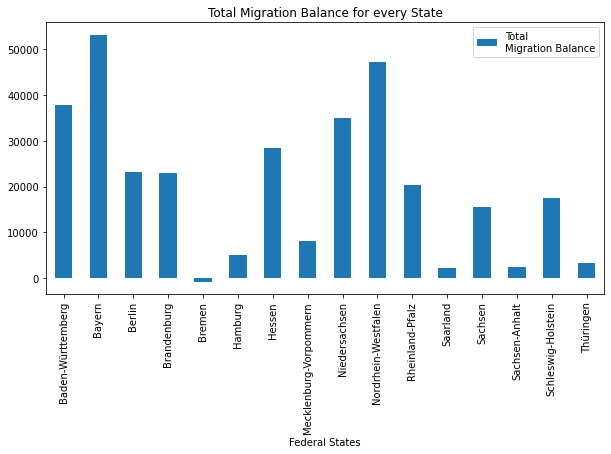

In [22]:
df.plot(title = 'Total Migration Balance for every State', x = 'Federal States', y = ['Total \nMigration Balance'],
kind = "bar", figsize = (10,5))
plt.show()

#### Every state has a migration surplus, except for Bremen where slightly more people have been emigrating than immigrating in 2019. In all the other states, immigration outweighed emigration. Baden-Württemberg, Bayern, Nordrhein-Westfalen and Niedersachsen, the states with the largest population, had the largest growth in 2019. Baden-Württemberg, Bayern and Nordrhein-Westfalen have a high number of foreign people immigrating and emigrating, but since immigration is a larger factor than emigration in these states as seen in the total migration balance, their foreign immigration is the most meanigful migration dynamic. However, the total migration balance is only displayed in total numbers for each state, not considering the different population sizes. To get an idea of how meaningful a state's migration surplus can be, we need to look at it in accordance with each state's total population.

#### To weigh the immigration/emigration tendencies with the total migration balance, I divide every state's migration surplus (or in Bremen's case, (e)migration surplus) by its total population, calculating how much percent of a state's total population are made of its migration surplus. 

In [46]:
df['Total Migration Balance/Total Population'] = df['Total \nMigration Balance'] / df['Population ']
df

,Year,Federal States,Population,Area in km²,Inhabitants per km²,Percentage of inhabitants with migration background,Immigration German People,Emigration\nGerman People,Migration Balance \nGerman People,Immigration \nForeign People,Emigration \nForeign People,Migration Balance \nForeign People,Total \nImmigration,Total \nEmigration,Total \nMigration Balance,Total Migration Balance/Total Population,Percentage,Foreign Migration Balance/Total Population
0,2019,Baden-Württemberg,11100394,35747.83,311,0.338,116906,133599,-16693,251744,197269,54475,368650,330868,37782,0.003404,9.433436,0.004907
1,2019,Bayern,13124737,70541.57,186,0.259,112715,121155,-8440,282977,215989,61585,395692,337144,53145,0.004049,7.228579,0.004692
2,2019,Berlin,3669491,891.12,4090,0.331,72117,84995,-12878,112627,76518,36109,184744,161513,23231,0.006331,9.238069,0.009840
3,2019,Brandenburg,2521893,29654.43,85,0.086,56674,40587,16087,30564,23737,6827,87238,64324,22914,0.009086,2.400223,0.002707
4,2019,Bremen,681202,419.37,1624,0.365,19134,23167,-4033,18192,14933,3259,37326,38100,-774,-0.001136,10.186994,0.004784
5,2019,Hamburg,1847253,755.09,2446,0.339,53419,57573,-4154,43820,34663,9157,97239,92236,5003,0.002708,9.461345,0.004957
6,2019,Hessen,6288080,21115.64,298,0.344,86234,94755,-8521,150140,113102,37038,236374,207857,28517,0.004535,9.600893,0.005890
7,2019,Mecklenburg-Vorpommern,1608138,23295.22,69,0.081,27517,21831,5686,18529,16172,2357,46046,38003,8043,0.005001,2.260675,0.001466
8,2019,Niedersachsen,7993608,47709.80,168,0.223,122484,117406,5078,149870,119919,29951,272354,237325,35029,0.004382,6.223835,0.003747
9,2019,Nordrhein-Westfalen,17947221,34112.44,526,0.308,141571,176442,-34871,302454,220327,82127,444025,396769,47256,0.002633,8.596148,0.004576


In [24]:
df1 = df[['Federal States', 'Total Migration Balance/Total Population']]
df1
df1.sort_values('Total Migration Balance/Total Population', ascending = False)

,Federal States,Total Migration Balance/Total Population
3,Brandenburg,0.009086
2,Berlin,0.006331
14,Schleswig-Holstein,0.006034
7,Mecklenburg-Vorpommern,0.005001
10,Rheinland-Pfalz,0.004987
6,Hessen,0.004535
8,Niedersachsen,0.004382
1,Bayern,0.004049
12,Sachsen,0.003834
0,Baden-Württemberg,0.003404


#### This table demonstrates that although Bayern or Nordrhein-Westfalen were exceeding the other states in their total migration balance, their ratio of migration to total population is not exceeding the other states. Nordrhein-Westfalen, Germany's most populous state, actually has one of the lowest ratios of all states, despite having the second highest number of total migration balance. Remarkably, Brandenburg tops the list, with its migration surplus having the highest share of its total population at roughly 0.91%. Berlin has the next closest ratio of migration surplus to total population at ca. 0.63%, closely followed by Schleswig-Holstein at ca. 0.60%. All ratios seem to be quite low, but it is decisive to look at these numbers in relation to each other. The ratio of Brandenburg and its difference to other, more migration dominated states like Baden-Württemberg, Bayern or Nordrhein-Westfalen seems extraordinary. This means that, considering its relatively low population, Brandenburg has a quite big immigration tendency. One hypothetical explanation for this trend: as Berlin also shows a striking immigration tendency, though not as striking as Brandenburg's, many people originally moving to Berlin or working in Berlin might have moved to the surrounding state of Brandenburg, where rents are generally lower, room is larger and going to the city is not a problem with a far-reaching system of public transportation within and outside the city borders. Although states like Sachsen-Anhalt or Thüringen are demographically very similar to Brandenburg in terms of total population, inhabitants per km² or percentage of inhabitants with migration background, their ratio of migration surplus to total population is remarkably lower (Sachsen-Anhalt: ca. 0.11%, Thüringen: ca. 0.16%) than Brandenburg's (ca. 0.91%). That could be because they do not have a major city - particularly not Germany's largest city - within or at their borders. 

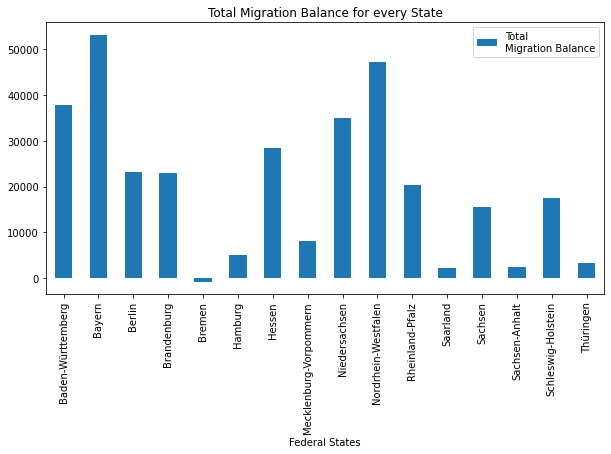

In [25]:
df.plot(title = 'Total Migration Balance for every State', x = 'Federal States', y = ['Total \nMigration Balance'],
kind = "bar", figsize = (10,5))
plt.show()

#### **Conclusions:** Brandenburg's ratio of immigration to emigration in relation to its total population is very much in favor of immigration, which in turn is over 20% higher for people with German background. German immigration to Brandenburg is therefore very striking. However, foreign immigration to Brandenburg is not far off in overall view, since also over 50% more German than foreign people are emigrating. Berlin, having the second highest ratio of total migration balance to total population, has immigration numbers that are strongly in favor of people with migration background. Considering the fact that there are also more German than foreign people emigrating, Berlin's number of people with migration background immigrating is very meaningful. Schleswig-Holstein is very similar to Brandenburg in all regards of migration, but its migration surplus in relation to its total population is not as high as in Brandenburg. Other states that already had very unremarkable migration balances like Hamburg, Saarland, Sachsen-Anhalt or Thüringen also have a very low ratio of migration surplus to total population, while Nordrhein-Westfalen, the state with the second most highest migration surplus, has a similarly low ratio of migration surplus to total population (ca. 0.26%). Another way to classify the migration/population ratios is to calculate an average value:

In [26]:
df['Total Migration Balance/Total Population'].mean()

0.003795374402868876

In [27]:
df.columns

Index(['Year', 'Federal States', 'Population ', 'Area in km²',
       'Inhabitants per km² ',
       'Percentage of inhabitants  with migration background ',
       'Immigration German People', 'Emigration\nGerman People',
       'Migration Balance \nGerman People', 'Immigration \nForeign People',
       'Emigration \nForeign People', 'Migration Balance \nForeign People',
       'Total \nImmigration', 'Total \nEmigration',
       'Total \nMigration Balance',
       'Total Migration Balance/Total Population'],
      dtype='object')

In [28]:
df2 = df[['Federal States', 'Total \nMigration Balance', 'Population ', 'Total Migration Balance/Total Population']]
df2
df2.head(4).sort_values('Total \nMigration Balance', ascending = False)

,Federal States,Total \nMigration Balance,Population,Total Migration Balance/Total Population
1,Bayern,53145,13124737,0.004049
0,Baden-Württemberg,37782,11100394,0.003404
2,Berlin,23231,3669491,0.006331
3,Brandenburg,22914,2521893,0.009086


#### States with largest population

In [29]:
df2.sort_values('Population ', ascending = False).head(4)

,Federal States,Total \nMigration Balance,Population,Total Migration Balance/Total Population
9,Nordrhein-Westfalen,47256,17947221,0.002633
1,Bayern,53145,13124737,0.004049
0,Baden-Württemberg,37782,11100394,0.003404
8,Niedersachsen,35029,7993608,0.004382


#### The average ratio of migration surplus to total population for all states is around 0.38%. Regarding the four most populous states, we already established that Nordrhein-Westfalen has a remarkably low ratio of migration surplus to total population. Looking at the other three with regards to the average ratio, Bayern and Niedersachsen are slightly above average concerning the migration/population ratio (Bayern: ca. 0.41%, Niedersachsen: ca. 0.44%), while Baden-Württemberg is slightly below average (ca. 0.34%).

In [30]:
immigration_emigration

,Baden-Württemberg,Bayern,Berlin,Hessen,Nordrhein-Westfalen,Niedersachsen,Saarland,Rheinland-Pfalz,Thüringen,Brandenburg,Hamburg,Mecklenburg-Vorpommern,Schleswig-Holstein,Bremen,Sachsen,Sachsen-Anhalt
Immigration/Emigration Tendencies,"(F_I_50, F_E_20)","(F_I_50, F_E_50)","(F_I_50, G_E_05)","(F_I_50, F_E_05)","(F_I_50, F_E_20)","(F_I_20, Em_balanced)","(F_I_20, G_E_20)","(F_I_05, G_E_05)","(F_I_05, G_E_20)","(G_I_20, G_E_50)","(G_I_20, G_E_50)","(G_I_20, G_E_20)","(G_I_20, G_E_50)","(G_I_05, G_E_50)","(Im_balanced, G_E_05)","(Im_balanced, G_E_05)"


#### Migration dynamics are "divergent" in case of following pairings: (F, G), (50, 05), (50/20, balanced) 
#### Adding to the states already named divergent (Berlin, Hessen, Niedersachsen, Saarland, Rheinland-Pfalz, Thüringen and Bremen) will be all the other states with remarkable migration/population ratios and differentiated migration dynamics (50 to 20, 20 to 05, 05 to balanced).

In [31]:
df1

,Federal States,Total Migration Balance/Total Population
0,Baden-Württemberg,0.003404
1,Bayern,0.004049
2,Berlin,0.006331
3,Brandenburg,0.009086
4,Bremen,-0.001136
5,Hamburg,0.002708
6,Hessen,0.004535
7,Mecklenburg-Vorpommern,0.005001
8,Niedersachsen,0.004382
9,Nordrhein-Westfalen,0.002633


In [32]:
df2.sort_values('Total Migration Balance/Total Population', ascending = False).head(4)

,Federal States,Total \nMigration Balance,Population,Total Migration Balance/Total Population
3,Brandenburg,22914,2521893,0.009086
2,Berlin,23231,3669491,0.006331
14,Schleswig-Holstein,17521,2903773,0.006034
7,Mecklenburg-Vorpommern,8043,1608138,0.005001


### **Divergences: Brandenburg, Schleswig-Holstein (German Immigration) Berlin, Hessen, Niedersachsen (Foreign Immigration) Bremen, Thüringen (German Emigration) Rheinland-Pfalz, Saarland (Foreign Immigration to a smaller extent than Berlin, Hessen and Niedersachsen)**
#### **Brandenburg and Schleswig-Holstein are new additions to the list of states with divergent migration dynamics in special regard to their total population. Both states have a smaller tendency for German immigration, but a greater tendency for overall immigration compared to emigration.** 

#### Now as we have looked at the states' migration dynamics in relation to their total population, it is a logical next step to consider the population density of each state. Through this factor we can distinguish the three city states (only Berlin, Hamburg and Bremen have a four digits population density) as well as get an orientation of how migration can be viewed according to density. Higher density is closely linked to higher urbanization and means a higher priority of using area for residence rather than for example nature preservation, agriculture or tourism. 

#### Of course we can't look at migration numbers directly in relation to population density, but dividing the values of total migration balance by density, we can get a picture of how similar migration balances can look different in relation to density. If a total migration balance value is high enough to "withstand" a high density value or the density value itself is rather low, the result should be clearly above 1. How far it can actually go above zero and which values above zero are still too low to be considered remarkable can only be decided by again relating the values of all states directly to each other. 

In [33]:
df2 = df1[['Federal States', 'Total Migration Balance/Total Population']]
df2['Total Migration Balance/Density'] = df['Total \nMigration Balance'] / df['Inhabitants per km² ']
df2.sort_values('Total Migration Balance/Density', ascending = False)

,Federal States,Total Migration Balance/Total Population,Total Migration Balance/Density
1,Bayern,0.004049,285.725806
3,Brandenburg,0.009086,269.576471
8,Niedersachsen,0.004382,208.505952
0,Baden-Württemberg,0.003404,121.485531
7,Mecklenburg-Vorpommern,0.005001,116.565217
10,Rheinland-Pfalz,0.004987,99.106796
6,Hessen,0.004535,95.694631
14,Schleswig-Holstein,0.006034,95.222826
9,Nordrhein-Westfalen,0.002633,89.840304
12,Sachsen,0.003834,70.642534


In [34]:
df2['Total Migration Balance/Density'].mean()

94.59262815908023

#### Every state (except Bremen of course) reached a value above 1, yet the values for Berlin, Hamburg and Saarland are remarkably low and only one digit numbers, contrary to the other values being at least two digit numbers. The most values range between 10 and 100, being the case with 7 of the 16 states. 5 states have values over 100, with 3 of them being over 200. Considering the average value of ca. 94.6 and the huge difference of the values starting around 90 to the next lowest values (next lowest ca. 70, next lowest after that ca. 25) I would view those values around 90 as a minimum reference point to consider remarkable. However, it is the values above 200 where it gets interesting: the difference between the lowest value above 200 (Niedersachsen: ca. 208) and the next lowest value (Baden-Württemberg: ca. 121) is around 87. This difference itself is almost as much as the migration/density average value (ca. 94.6) and more than double the difference to any next lowest values beforehand. This way, Bayern, Brandenburg and Niedersachsen really stand out. With Brandenburg, we already know that the state had the highest ratio of total migration balance to total population. This high ratio maintains in relation to density, since Brandenburg's density is also one of the lowest in Germany. Bayern has the highest ratio of migration balance to density at ca. 285. Bayern had the second highest total migration balance overall, but also the second highest total population, which meant its migration/population ratio was only average in overall comparison. In terms of density however, Bayern's migration balance stands out again, meaning its density is quite divergent from its total population. Niedersachsen at a ratio of ca. 208 is a similar case to Bayern: it also had a high total migration balance (fourth highest of all states), which in relation to its relatively large population only resulted in an average value. In relation to its density however, Niedersachsen's migration balance again stands out, although not as exceedingly as Bayern's. There is still a difference of roughly 80 between Bayern's (ca. 285) and Niedersachsen's (ca. 208) migration/density ratios. 
#### **As Bayern, Brandenburg and Niedersachsen have a particular low density in relation to their total migration balance, it could be assumed that their relatively low population density is on the rise or that certain major cities in or around their borders attract a lot more people.**

# 4) Migration background and mapping

In [35]:
from geopandas.tools import geocode
from shapely.geometry import LineString, MultiPolygon

#### Like the numbers for total population and population density, the percentage of people with migration background in each state is also a number not corresponding to migration dynamics. I could again try to unorthodoxically compare the population numbers to the migration numbers like I did with the population density, but in this case I simply want to display the migration background percentages as what they are. However, there is a twist: I will not show them as percentages of the total population, but as percentages of their sum, adding their respective percentage values as if they were total values. From this sum, each state's percentage value will gain a new percentage value, which I then plan to visualize in a pie chart.

In [36]:
df['Percentage of inhabitants  with migration background '].sum()

3.583

In [37]:
df['Percentage'] = (df['Percentage of inhabitants  with migration background '] 
/ df['Percentage of inhabitants  with migration background '].sum()*100)
dpie = df[['Federal States', 'Percentage']]
dpie

,Federal States,Percentage
0,Baden-Württemberg,9.433436
1,Bayern,7.228579
2,Berlin,9.238069
3,Brandenburg,2.400223
4,Bremen,10.186994
5,Hamburg,9.461345
6,Hessen,9.600893
7,Mecklenburg-Vorpommern,2.260675
8,Niedersachsen,6.223835
9,Nordrhein-Westfalen,8.596148


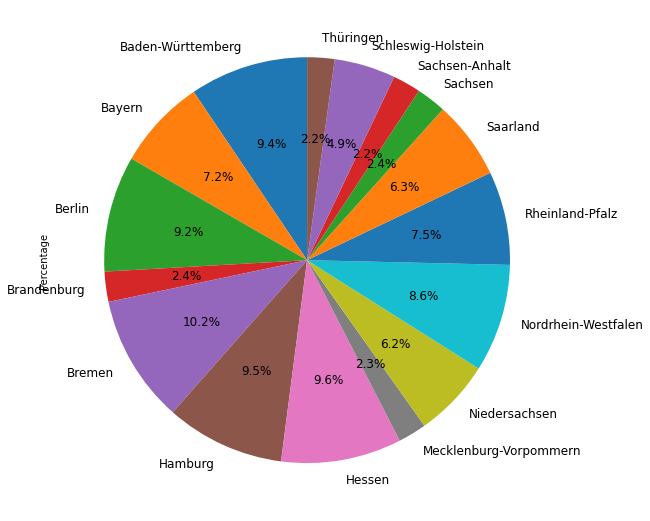

In [38]:
ax1 = plt.subplot(121, aspect = 'equal')
dpie.plot(kind = 'pie', y = 'Percentage', ax = ax1, autopct = '%1.1f%%', 
startangle = 90, labels = df['Federal States'], legend = False, fontsize = 12, figsize = (20,15))
plt.show()

#### Some states clearly stand out: comprising the six states with a share of over 8% are the ones with the largest population (Nordrhein-Westfalen: ca. 8.6%, Baden-Württemberg: ca. 9.4%) and the highest population density (Berlin: ca. 9.2%, Hamburg: ca. 9.5%, Bremen: ca. 10.2%) as well as Hessen with a share of ca. 9.6%. Yet, contrary to the other five states, only Berlin and Hessen did also have an exceeding number of foreign immigration in 2019. The third state with a major surplus of foreign immigration, Niedersachsen, only has a share of ca. 6.2%. In terms of migration background, this graph provides us with a tendency that was already implied by interpreting migration numbers, but only becomes clear with this status quo. All the states with a share of under 3%, namely Brandenburg, Mecklenburg-Vorpommern, Sachsen, Sachsen-Anhalt and Thüringen, are states of former East Germany or the GDR. I will now use geographical data to further my interpretation of the migration or population dynamics.

### Map: Percentages of people with migration background in ratio of their sum

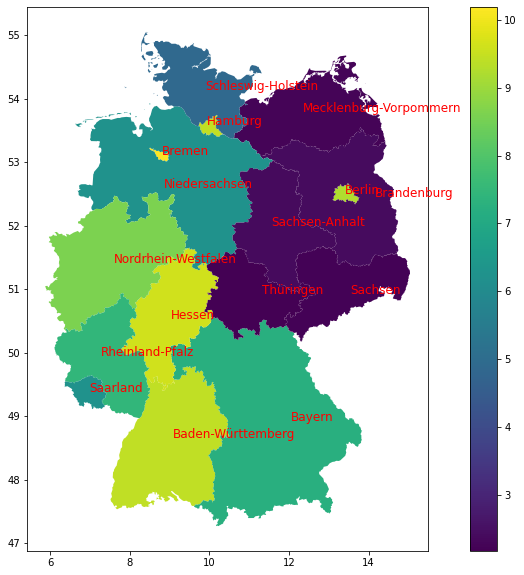

In [49]:
#gdf=geopandas.read_file('C:/Users/josch/Desktop/3_mittel.geo.json')
gdf['Percentage'] = dpie[['Percentage']]
gdf['migration_population'] = df1[['Total Migration Balance/Total Population']]
gdf['migration_density'] = df2[['Total Migration Balance/Density']]

gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]
gdf.plot('Percentage', legend = True, figsize = (15,10))
for idx, row in gdf.iterrows():
    plt.annotate(text = row['name'], xy = row['coords'], color = 'red', fontsize = 12)

#### Here we have the visualization of the states and their migration background percentage. The whole territory of former East Germany (excluding East Berlin) is coloured in dark purple, showing a strong contrast to the green-ish or in the case of Schleswig-Holstein blue-ish shades. The contrast to Berlin is particularly striking, as it is geographically situated in Eastern Germany, but has one of the highest percentages of inhabitants with migration background. 

### Map: Migration balance dependant on total population

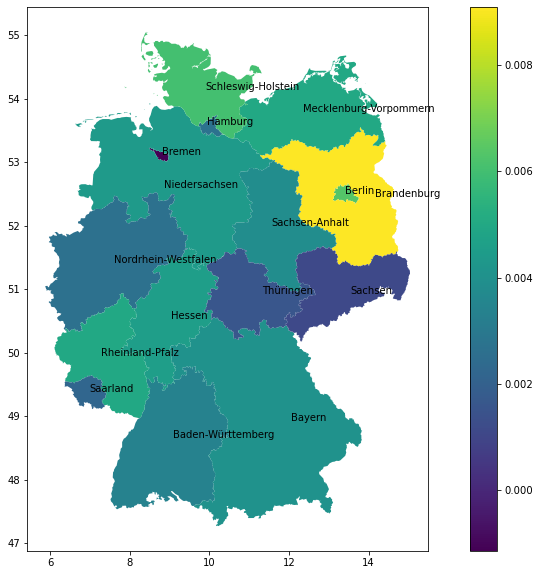

In [48]:
gdf.plot('migration_population', legend = True, figsize = (15,10))
for idx, row in gdf.iterrows():
    plt.annotate(text = row['name'], xy = row['coords'])

#### With the tendencies of the previous map in mind, Brandenburg stands out in more than one way. In the case of migration/population ratio, Eastern German states are not exclusively at the bottom (although Sachsen and Thüringen do have some of the lowest ratios) like in the previous map. Brandenburg's extraordinary migration ratio is most certainly connected to its geographical location surrounding Berlin. 

### Map: Migration balance dependant on population density

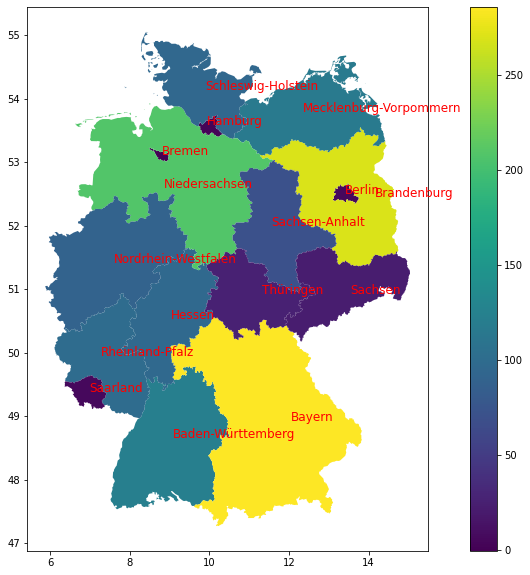

In [50]:
gdf.plot('migration_density', legend = True, figsize = (15,10))
for idx, row in gdf.iterrows():
    plt.annotate(text = row['name'], xy = row['coords'], color = 'red', fontsize = 12)

#### There seems to be no extraordinary pattern with this map, but Brandenburg's ratio again stands out. The city states are quite low because of their high population density, but also Saarland and (like in the previous map) Sachsen and Thüringen show very low ratios. Bayern's ratio is clearly the highest, perhaps because it has one of the largest areas and therefore lower densities in comparison to other states with high migration surplus. 

#### **Conclusions:** While the percentage of inhabitants with migration background has a clear tendency towards the states of former West Germany, the migration dynamics seem to be more drawn to states surrounding or bordering major cities. Looking at the ratio of migration balance to total population, Brandenburg stood out. It is surrounding the capital Berlin, which also had one of the highest ratios. The third highest ratio, coming from Schleswig-Holstein, might be related to it being located around the borders of major city Hamburg. In terms of migration balance to population density, Bayern's major cities of Bavaria and Nuremberg (not shown in map) might have been a deciding factor for its extraordinary migration dynamics, while Niedersachsen not only borders the south of Hamburg, but fully surrounds the other city state of Bremen. Bayern and Niedersachsen are the largest states by area, which explains their lower densities and therefore higher ratios in this regard.